# BoomBikes Bike Sharing Data Analysis and Modelling

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('day.csv')

## Data Understanding

In [3]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
df.shape

(730, 16)

In [5]:
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [8]:
df.size

11680

In [9]:
df.corr()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,1.000000,4.135867e-01,8.660262e-01,4.982507e-01,0.016275,-0.000023,-0.004619,-0.021862,0.150738,0.152773,0.016080,-0.112667,0.275604,0.660544,0.629896
season,0.413587,1.000000e+00,-3.279074e-16,8.310321e-01,-0.010868,-0.003081,0.013762,0.021306,0.333361,0.342014,0.208220,-0.229607,0.208737,0.410310,0.404584
yr,0.866026,-3.279074e-16,1.000000e+00,-5.162656e-16,0.008195,-0.005466,-0.002945,-0.050322,0.048789,0.047215,-0.112547,-0.011624,0.250502,0.596911,0.569728
mnth,0.498251,8.310321e-01,-5.162656e-16,1.000000e+00,0.018905,0.009523,-0.004688,0.045613,0.219083,0.226430,0.224937,-0.208013,0.121208,0.291952,0.278191
holiday,0.016275,-1.086804e-02,8.195345e-03,1.890483e-02,1.000000,-0.101962,-0.252948,-0.034395,-0.028764,-0.032703,-0.015662,0.006257,0.054055,-0.109142,-0.068764
weekday,-0.000023,-3.081198e-03,-5.466369e-03,9.522969e-03,-0.101962,1.000000,0.035800,0.031112,-0.000168,-0.007539,-0.052290,0.014283,0.059978,0.057427,0.067534
workingday,-0.004619,1.376178e-02,-2.945396e-03,-4.687953e-03,-0.252948,0.035800,1.000000,0.060236,0.053470,0.052940,0.023202,-0.018666,-0.517607,0.305437,0.062542
weathersit,-0.021862,2.130636e-02,-5.032247e-02,4.561335e-02,-0.034395,0.031112,0.060236,1.000000,-0.119503,-0.120559,0.590277,0.039769,-0.246044,-0.259025,-0.295929
temp,0.150738,3.333607e-01,4.878919e-02,2.190833e-01,-0.028764,-0.000168,0.053470,-0.119503,1.000000,0.991696,0.128565,-0.158186,0.542731,0.539436,0.627044
atemp,0.152773,3.420139e-01,4.721519e-02,2.264302e-01,-0.032703,-0.007539,0.052940,-0.120559,0.991696,1.000000,0.141512,-0.183876,0.543362,0.543678,0.630685


## Data Cleaning 

In [10]:
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [11]:
df.nunique()

instant       730
dteday        730
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
casual        605
registered    678
cnt           695
dtype: int64

In [12]:
# Droping instant column as it is index column which has nothing to do with target
df.drop(['instant'], axis = 1, inplace = True)

# Dropping dteday as we have already have month and weekday columns to work with
df.drop(['dteday'], axis = 1, inplace = True)

# Dropping casual and registered columnsa as as we have cnt column which is sum of the both that is the target column

df.drop(['casual'], axis = 1, inplace = True)
df.drop(['registered'], axis = 1, inplace = True)

## EDA

In [13]:
df['season'].replace({1:"Spring", 2:"Summer", 3:"Fall", 4:"Winter"},inplace = True)

df['weathersit'].replace({1:'Good',2:'Moderate',3:'Bad',4:'Severe'},inplace = True)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,1,0,6,0,Moderate,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,1,0,0,0,Moderate,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,1,0,1,1,Good,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,1,0,2,1,Good,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,1,0,3,1,Good,9.305237,11.46350,43.6957,12.522300,1600


In [14]:
df['mnth'] = df['mnth'].replace({1: 'January',2: 'February',3: 'March',4: 'April',5: 'May',6: 'June',
                  7: 'July',8: 'August',9: 'September',10: 'October',11: 'November',12: 'December'})

df['weekday'] = df['weekday'].replace({0: 'Sunday',1: 'Monday',2: 'Tuesday',3: 'Wednesday',4: 'Thursday',5: 'Friday',6: 'Saturday'})
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,January,0,Saturday,0,Moderate,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,January,0,Sunday,0,Moderate,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,January,0,Monday,1,Good,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,January,0,Tuesday,1,Good,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,January,0,Wednesday,1,Good,9.305237,11.46350,43.6957,12.522300,1600


Note: NumExpr detected 12 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
NumExpr defaulting to 8 threads.


<Figure size 1080x2160 with 0 Axes>

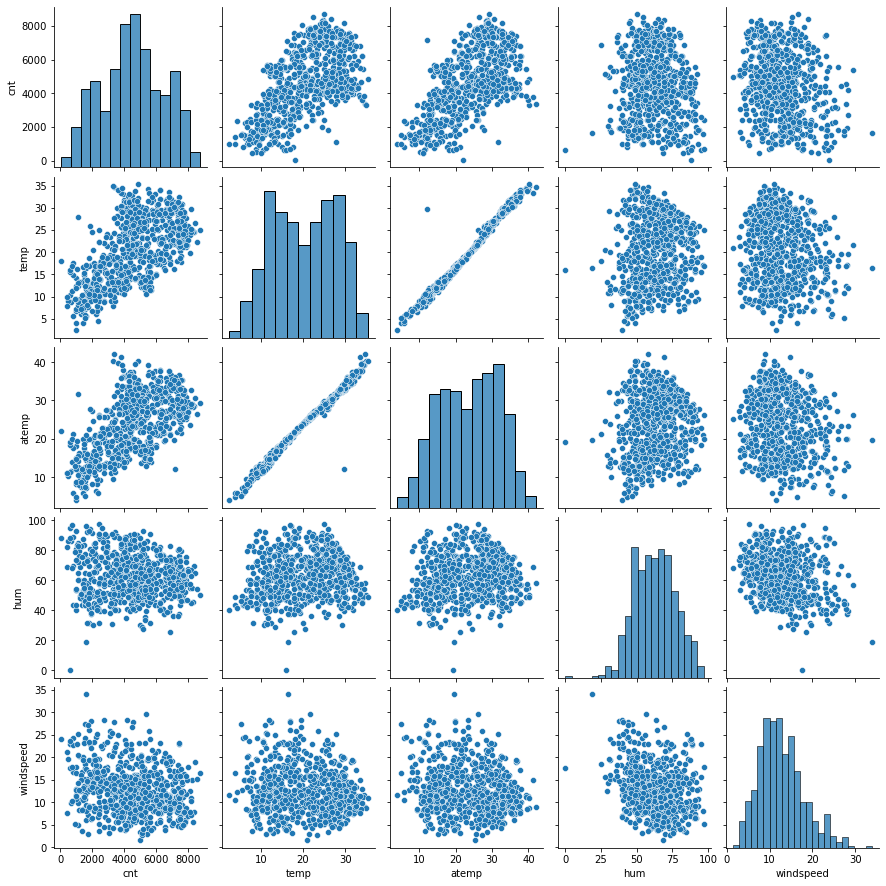

In [15]:
plt.figure(figsize = (15,30))
sns.pairplot(data=df,vars=['cnt', 'temp', 'atemp', 'hum','windspeed'])
plt.show()

Seen that we have the positive corelation between Temp (independent) and cnt (Dependent) variables.

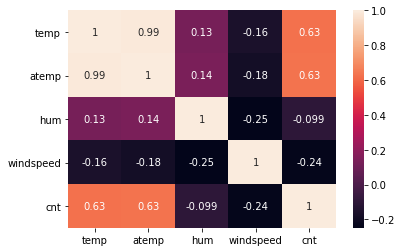

In [16]:
sns.heatmap(df[['temp','atemp','hum','windspeed','cnt']].corr(), annot = True)
plt.show()

Temp and atemp are closely related to eachother.

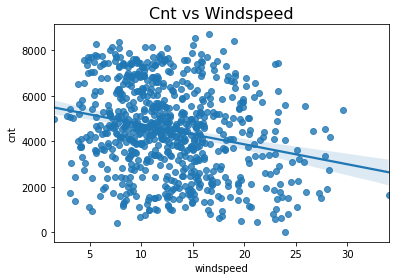

In [17]:
plt.title("Cnt vs Windspeed",fontsize=16)
sns.regplot(data=df,y="cnt",x="windspeed")
plt.show()

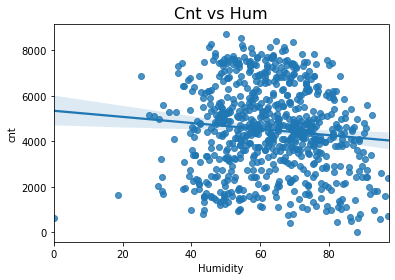

In [18]:
plt.title("Cnt vs Hum",fontsize=16)
sns.regplot(data=df,y="cnt",x="hum")
plt.xlabel("Humidity")
plt.show()

In [19]:
df.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

<AxesSubplot:xlabel='season', ylabel='cnt'>

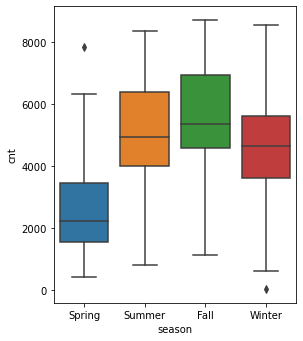

In [20]:
plt.figure(figsize=(20, 12))
plt.subplot(2,4,1)
sns.boxplot(x = 'season', y = 'cnt', data = df)

Season column gives a handful insight says that “Fall” and “Summer” season seen a greater booking as compared another season.

<AxesSubplot:xlabel='weekday', ylabel='cnt'>

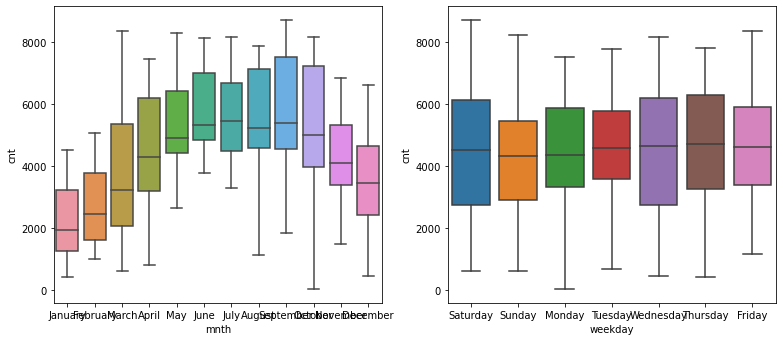

In [21]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'mnth', y = 'cnt', data = df)
plt.subplot(2,3,2)
sns.boxplot(x = 'weekday', y = 'cnt', data = df)

During the summer period i.e., June, July recorded a greater number of Bike counts.

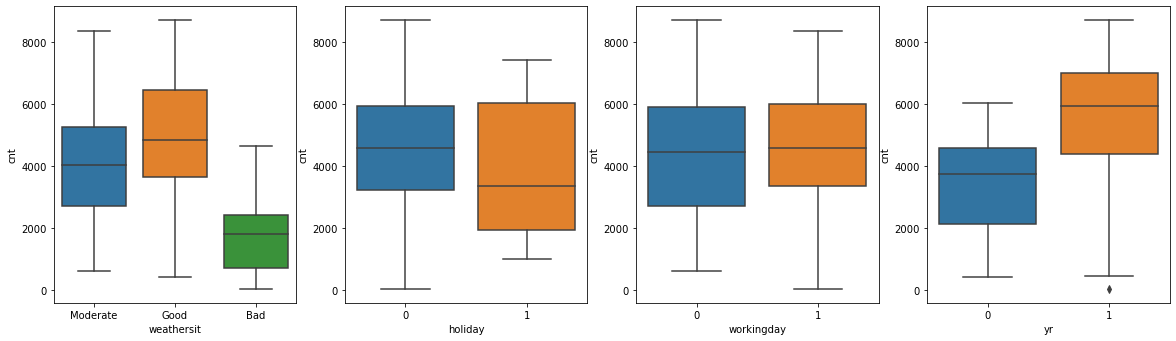

In [22]:
plt.figure(figsize=(20, 12))
plt.subplot(2,4,1)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df)
plt.subplot(2,4,2)
sns.boxplot(x = 'holiday', y = 'cnt', data = df)
plt.subplot(2,4,3)
sns.boxplot(x = 'workingday', y = 'cnt', data = df)
plt.subplot(2,4,4)
sns.boxplot(x = 'yr', y = 'cnt', data = df)
plt.show()

Weather seems to also have a impact on bike rental we can infer on the bar plot.
Significant increase in rentals YOY.
Holiday seems to be downside as no one interests in bikes as they can opt for a family trip, which can’t be accommodated on Bike.

## Data Preparation

In [23]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,January,0,Saturday,0,Moderate,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,January,0,Sunday,0,Moderate,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,January,0,Monday,1,Good,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,January,0,Tuesday,1,Good,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,January,0,Wednesday,1,Good,9.305237,11.46350,43.6957,12.522300,1600


In [24]:
df = pd.get_dummies(data=df,columns=["season","mnth","weekday","weathersit"],drop_first=True)

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

In [28]:
num_pipeline = Pipeline([
                         ('imputer', SimpleImputer(strategy = "median")),
                         ('std_scaler', StandardScaler()),
])

In [29]:
df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter,mnth_August,mnth_December,mnth_February,mnth_January,mnth_July,mnth_June,mnth_March,mnth_May,mnth_November,mnth_October,mnth_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Good,weathersit_Moderate
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0


In [30]:
var = ['temp','atemp','hum','windspeed','cnt']
scaler = StandardScaler()
df[var] = num_pipeline.fit_transform(df[var])

In [31]:
df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter,mnth_August,mnth_December,mnth_February,mnth_January,mnth_July,mnth_June,mnth_March,mnth_May,mnth_November,mnth_October,mnth_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Good,weathersit_Moderate
0,0,0,0,-0.827613,-0.680818,1.252343,-0.387833,-1.820972,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,0,0,0,-0.722069,-0.741507,0.480996,0.748899,-1.916078,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0,0,1,-1.635432,-1.750344,-1.338073,0.745931,-1.632827,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
3,0,0,1,-1.615560,-1.610886,-0.261577,-0.389769,-1.522732,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
4,0,0,1,-1.468226,-1.505615,-1.340294,-0.046477,-1.503090,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0


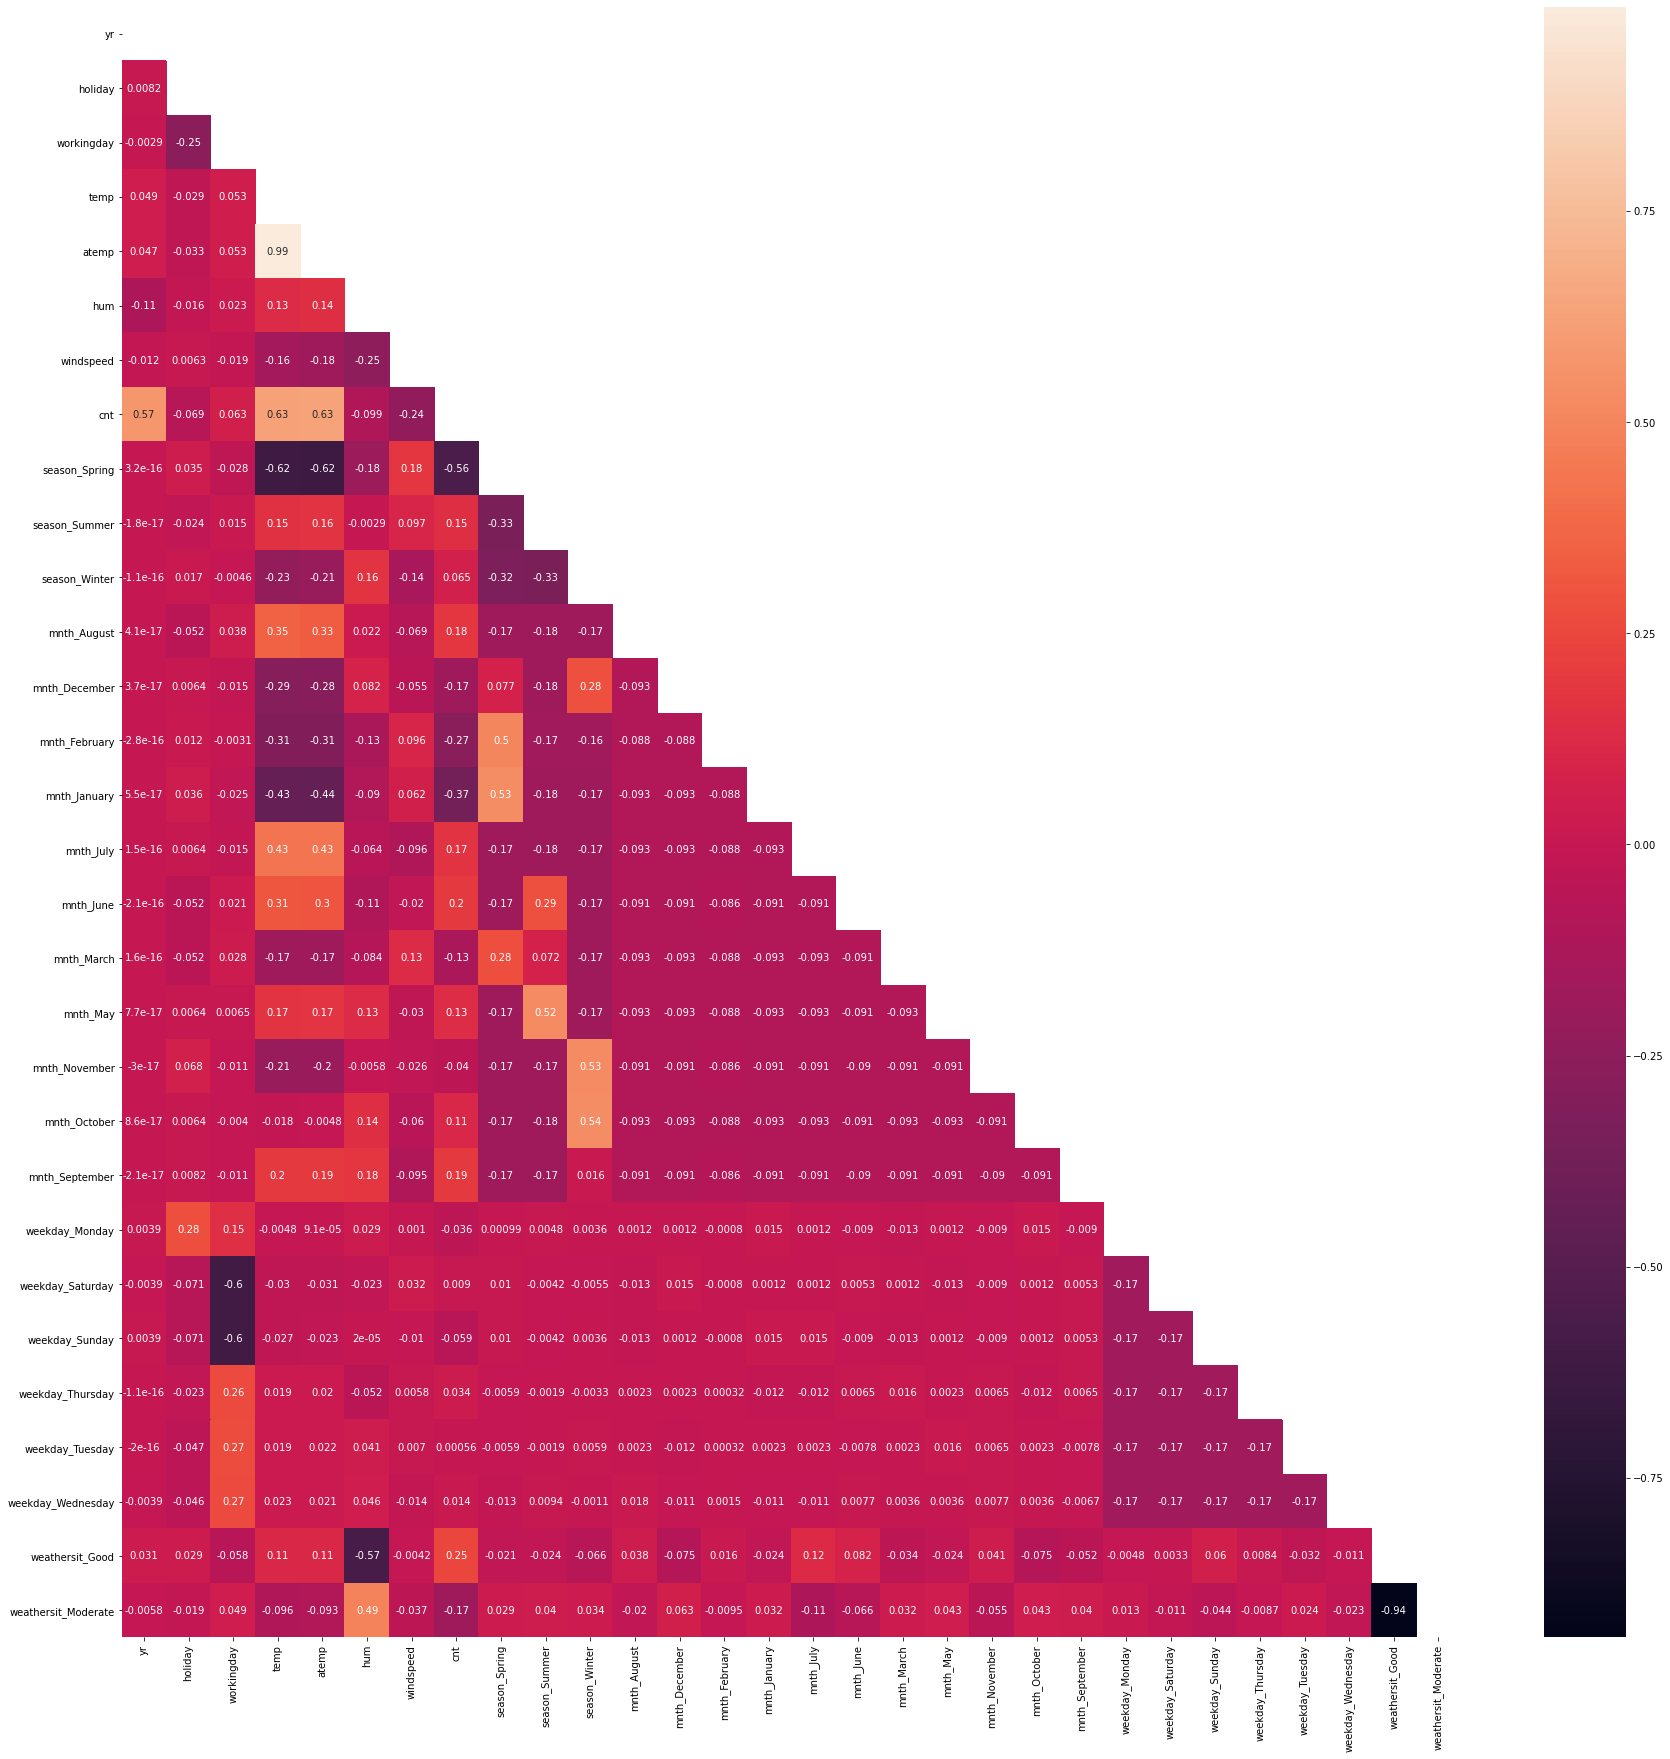

In [32]:
plt.figure(figsize = (30,30))
matrix = np.triu(df.corr())
sns.heatmap(df.corr(), annot = True, mask=matrix)
plt.show()

cnt seems to have correlation with year variable and temp. Similarly, Misty and humidity show correlation. Spring season with Jan and Feb month, Summer season with may month and Winter season with oct and nov month show good correlation.

# Model Building

In [33]:
#y to contain only target variable
y = df['cnt']

#X is all remainign variable also our independent variables
X = df.drop(['cnt'], axis=1)

#Train Test split with 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [34]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(511, 29)
(219, 29)
(511,)
(219,)


### OLS Method

In [35]:
lr_1 = sm.OLS(y_train,X_train).fit()
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     96.02
Date:                Tue, 12 Jul 2022   Prob (F-statistic):          1.78e-177
Time:                        10:21:25   Log-Likelihood:                -244.29
No. Observations:                 511   AIC:                             546.6
Df Residuals:                     482   BIC:                             669.4
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
yr                      1.0096    

### Linear Regression using Sklearn

In [36]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [37]:
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

In [38]:
from sklearn.metrics import r2_score
print(r2_score(y_test, y_test_pred))
print(r2_score(y_train, y_train_pred))

0.8368179276158049
0.8479702455818474


In [39]:
lr.coef_

array([ 1.00956693, -0.1805114 ,  0.14083154,  0.19326213,  0.24115603,
       -0.10410142, -0.09443887, -0.63003302,  0.04859846,  0.32895939,
       -0.03482828, -0.15347599,  0.08272598,  0.01853492, -0.17348616,
        0.01192651,  0.24913148,  0.14176914, -0.20828659,  0.17328309,
        0.3307503 , -0.0841273 ,  0.12082766, -0.08114779, -0.02937337,
       -0.11906231, -0.0416563 ,  0.96864127,  0.71851846])

Feature: 0, Score: 1.00957
Feature: 1, Score: -0.18051
Feature: 2, Score: 0.14083
Feature: 3, Score: 0.19326
Feature: 4, Score: 0.24116
Feature: 5, Score: -0.10410
Feature: 6, Score: -0.09444
Feature: 7, Score: -0.63003
Feature: 8, Score: 0.04860
Feature: 9, Score: 0.32896
Feature: 10, Score: -0.03483
Feature: 11, Score: -0.15348
Feature: 12, Score: 0.08273
Feature: 13, Score: 0.01853
Feature: 14, Score: -0.17349
Feature: 15, Score: 0.01193
Feature: 16, Score: 0.24913
Feature: 17, Score: 0.14177
Feature: 18, Score: -0.20829
Feature: 19, Score: 0.17328
Feature: 20, Score: 0.33075
Feature: 21, Score: -0.08413
Feature: 22, Score: 0.12083
Feature: 23, Score: -0.08115
Feature: 24, Score: -0.02937
Feature: 25, Score: -0.11906
Feature: 26, Score: -0.04166
Feature: 27, Score: 0.96864
Feature: 28, Score: 0.71852


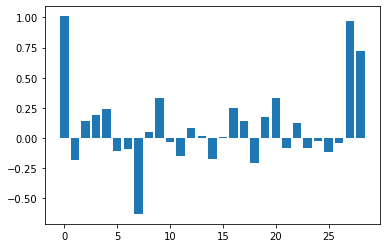

In [40]:
importance = lr.coef_
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

### Linear Regression using GridSearchCV & Sklearn

In [41]:
from sklearn.model_selection import GridSearchCV
model = lr
parameters = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}
grid = GridSearchCV(model,parameters, cv=None)
grid.fit(X_train, y_train)
print ("r2 / variance : ", grid.best_score_)
print("Residual sum of squares: %.2f"
              % np.mean((grid.predict(X_test) - y_test) ** 2))

r2 / variance :  0.821256247858754
Residual sum of squares: 0.16
